In [2]:
import yaml
import numpy as np
import zstandard as zstd
import os
from OptimumFilter import *
from TraceSimulator import TraceSimulator
import matplotlib.pyplot as plt
from trace_IO import *
def read_yaml_to_dict(file_path):
    with open(file_path, 'r') as file:
        config_dict = yaml.safe_load(file)
    return config_dict
sampling_frequency = 3906250
vac_template = np.load("templates/vac_ch_template.npy")
sub_template = np.load("templates/sub_ch_template.npy")
noise_psd = np.load("../../templates/noise_psd_from_MMC.npy")
config = read_yaml_to_dict('/home/dwong/DELight_mtr/trigger_study/archive/wk11/config.yaml')
ts = TraceSimulator(config)
vac_of = OptimumFilter(vac_template, noise_psd, sampling_frequency)
sub_of = OptimumFilter(sub_template, noise_psd, sampling_frequency)

In [ ]:
trace = ts.generate(
            E=7000,
            x=-94, y=0, z=-1800,
            no_noise=False,
            type_recoil='ER',
            quantize=True,
            phonon_only=False
        )
trace = trace[0]
amps = []
chisqs = []
shifts = []
for ch in range(54):
    if ch < 45:
        ampl, chisq, shift, position = sub_of.rolling_fit_with_shift(trace[ch])
    else:
        ampl, chisq, shift, position = vac_of.rolling_fit_with_shift(trace[ch])
    
    # Store raw arrays
    amps.append(ampl)
    chisqs.append(chisq)
    shifts.append(shift)
    print("Channels with abs(shift) > 2000:")
for idx in bad_indices:
    shift_val = shifts[idx].item() if isinstance(shifts[idx], np.ndarray) else shifts[idx]
    amp_val = amps[idx].item() if isinstance(amps[idx], np.ndarray) else amps[idx]
    chisq_val = chisqs[idx].item() if isinstance(chisqs[idx], np.ndarray) else chisqs[idx]
    print(f"Index: {idx}, Shift: {shift_val}, Amplitude: {amp_val:.2f}, Chi²: {chisq_val:.2f}")


In [44]:

for i in range(10):
    print(f"\n--- Iteration {i+1} ---")
    
    trace = ts.generate(
        E=7000,
        x=-94, y=0, z=-1800,
        no_noise=False,
        type_recoil='ER',
        quantize=True,
        phonon_only=False
    )
    trace = trace[0]
    
    amps = []
    chisqs = []
    shifts = []
    
    for ch in range(54):
        if ch < 45:
            ampl, chisq, shift, position = sub_of.rolling_fit_with_shift(trace[ch])
        else:
            ampl, chisq, shift, position = vac_of.rolling_fit_with_shift(trace[ch])
        
        amps.append(ampl)
        chisqs.append(chisq)
        shifts.append(shift)
    
    # Convert to numpy arrays for filtering
    amps = np.array(amps)
    chisqs = np.array(chisqs)
    shifts = np.array(shifts)

    # Find and report large shifts
    mask = np.abs(shifts) > 2000
    bad_indices = np.where(mask)[0]
    
    if len(bad_indices) > 0:
        print("Channels with abs(shift) > 2000:")
        for idx in bad_indices:
            shift_val = shifts[idx].item() if isinstance(shifts[idx], np.ndarray) else shifts[idx]
            amp_val = amps[idx].item() if isinstance(amps[idx], np.ndarray) else amps[idx]
            chisq_val = chisqs[idx].item() if isinstance(chisqs[idx], np.ndarray) else chisqs[idx]
            print(f"Index: {idx}, Shift: {shift_val}, Amplitude: {amp_val:.2f}, Chi²: {chisq_val:.2f}")
    else:
        print("No bad shifts in this iteration.")



--- Iteration 1 ---
Channels with abs(shift) > 2000:
Index: 41, Shift: 11905, Amplitude: -2.07, Chi²: 0.87
Index: 45, Shift: -3556, Amplitude: 58.17, Chi²: 1.07
Index: 46, Shift: 2880, Amplitude: 10.92, Chi²: 0.94
Index: 48, Shift: -4704, Amplitude: 56.95, Chi²: 1.21
Index: 49, Shift: -3402, Amplitude: 101.43, Chi²: 1.21
Index: 50, Shift: -2358, Amplitude: 243.21, Chi²: 2.78
Index: 52, Shift: -3550, Amplitude: 22.71, Chi²: 1.01

--- Iteration 2 ---
Channels with abs(shift) > 2000:
Index: 20, Shift: -4049, Amplitude: 2.32, Chi²: 0.87
Index: 46, Shift: -4907, Amplitude: 50.78, Chi²: 1.21
Index: 47, Shift: -4845, Amplitude: 55.05, Chi²: 1.25
Index: 48, Shift: -4342, Amplitude: 42.95, Chi²: 1.10
Index: 50, Shift: -3203, Amplitude: 258.83, Chi²: 2.80
Index: 51, Shift: -2441, Amplitude: 85.81, Chi²: 1.14

--- Iteration 3 ---
Channels with abs(shift) > 2000:
Index: 45, Shift: -4260, Amplitude: 65.59, Chi²: 1.13
Index: 46, Shift: -4587, Amplitude: 30.55, Chi²: 1.08
Index: 47, Shift: -4773, Am

In [40]:
bad_indices

array([ 9, 14, 19, 47, 48, 49, 50, 53])

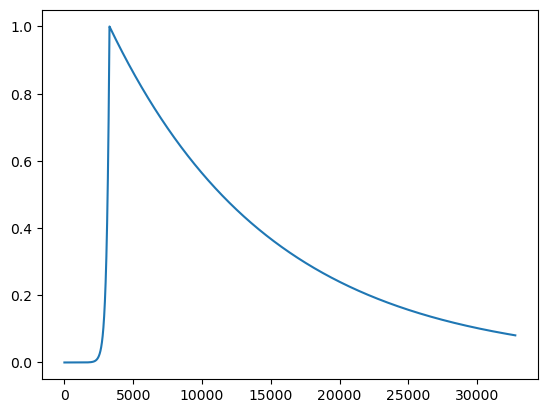

In [45]:
plt.plot(sub_template)

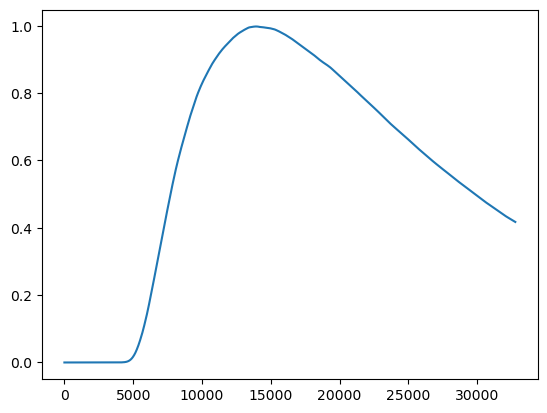

In [47]:
plt.plot(vac_template)